## Introduction
#### We will look at a collection of miscellaneous example datasets and go into techniques to extract meaning from the raw data.

## USA.gov Data from Bitly
#### Bitly is a URL shortening service. It partnered with the US government website USA.gov to provide feed of anonymous data gathered from users who shorten lnks ending with '.gov' or '.mil'.
#### The live feed and hourly snapshots were available as downloadable text files. The service was shut down in 2017.
#### As the dataset, we have an hourly snapshot, where each line is actually a JSON (JavaScript Object Notation) string.

In [159]:
path = 'datasets/bitly_usagov/example.txt'

open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

#### Python has both built-in and third-party libraries for converting a JSON string to Python dictionary object.
#### We will use the 'json' module and its 'loads' function on each line of the dataset. The output will be a Python list of dicts.

In [160]:
import json

path = 'datasets/bitly_usagov/example.txt'
records = [json.loads(line) for line in open(path)]

records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

### Counting Time Zones in pure Python
#### If we want to find the most often-occuring time zones in the dataset (present in tz field). There are many ways we could do this.
#### For this we can to extract a list of time zones using list comprehensions. But not all records have time zone field. We can check if 'tz' is present in record before adding it to this list.
#### We will notice that some of the fields in this list are unknown (i.e. empty string). We will leave this as it is for now.
#### To produce counts by time-zone, we have 2 approaches. The first is an iterative approach which adds to the count in a dictionary or a default-dict.
#### From the output we can get details like top 10 time zones and their counts with some dictionary acrobatics.

In [161]:
# time_zones = [rec['tz'] for rec in records]

In [162]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [163]:
# Ordinary dict with method definition
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [164]:
# Same method with default dict
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int) # Values will initialize to 0
    for x in sequence:
        counts[x] += 1
    return counts
        

In [165]:
counts = get_counts(time_zones)

counts['America/New_York']

1251

In [166]:
len(time_zones)

3440

In [167]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [168]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [169]:
from collections import Counter

counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

### Counting Time Zones with pandas
#### This is the second (easier way) of getting the time-zone data.
#### Creating DataFrame from original set of records is easy as passing list of records to 'pandas.DataFrame'.
#### The output of 'info' is a 'summary view', shown for large DataFrame. We can do a 'value_counts' after replacing missing values using 'fillna'.
#### The empty strings can be replaced with 'Unknown' string through Boolean indexing.
#### After the data munging, we can create a horizontal bar plot through 'seaborn' to visualize this data.

In [170]:
import pandas as pd

frame = pd.DataFrame(records)
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
_heartbeat_    120 non-null float64
a              3440 non-null object
al             3094 non-null object
c              2919 non-null object
cy             2919 non-null object
g              3440 non-null object
gr             2919 non-null object
h              3440 non-null object
hc             3440 non-null float64
hh             3440 non-null object
kw             93 non-null object
l              3440 non-null object
ll             2919 non-null object
nk             3440 non-null float64
r              3440 non-null object
t              3440 non-null float64
tz             3440 non-null object
u              3440 non-null object
dtypes: float64(4), object(14)
memory usage: 500.7+ KB


In [171]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [172]:
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [173]:
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()

tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

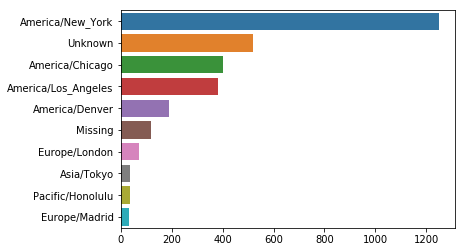

In [174]:
import seaborn as sns

subset = tz_counts[:10]
sns.barplot(y = subset.index, x = subset.values)

#### The field 'a' contains information on browser, device, or application used to perform URL shortening.
#### Parsing the data from the strings may seem daunting. One strategy is to split off first token from the string (which shows the browser capability) and make a strategy summary of user behaviour.

In [175]:
frame['a'][1]

'GoogleMaps/RochesterNY'

In [176]:
frame['a'][50]

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [177]:
results = pd.Series([x.split()[0] for x in frame.a.dropna()])
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [178]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

#### Next we may need to classify the top time zones into Windows and non-Windows users.
#### If a user is on Windows, the string 'Windows' will be in the agent string. We will exclude agents that are missing from the data.
#### Then we compute a value on whether each row is Windows or not and group the data by time zone and os column.
#### The group counts, just like 'value_counts' function, can be computed with 'size'. This result can be reshaped into a table with 'unstack'

In [179]:
cframe = frame[frame.a.notnull()]

In [180]:
import numpy as np

cframe['os'] = np.where(cframe['a'].str.contains('Windows'),
                       'Windows', 'Not Windows')

cframe['os'][:5]

C:\Users\adity\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

In [181]:
by_tz_os = cframe.groupby(['tz', 'os'])

agg_counts = by_tz_os.size().unstack().fillna(0)

agg_counts[:10]

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


#### After this, we can select top overall time zones. We can construct an indirect index array from the row counts in the DataFrame.
#### Then we can use 'take' to select the rows in that order, then slice off last 10 rows i.e. largest values.
#### pandas has a convinient method to replace this, 'nlargest', which does the same thing.

In [182]:
# To sort in ascending order
indexer = agg_counts.sum(1).argsort()

indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [183]:
count_subset = agg_counts.take(indexer[-10:])
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [184]:
agg_counts.sum(1).nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

#### We can then prepare this data for a stacked barplot. We can do this by passing an additional argument to seaborn's 'barplot' function.
#### The first plot that we create does not make it easy to see relative percentage of Windows users in smaller groups. So, we will normalize the group percentages to 1. Then we can implement a new bar plot with this percentage data.
#### The normalized sum could be achieved more efficiently using 'transform' method with 'groupby'.

In [185]:
# Rearrange data for plotting
count_subset = count_subset.stack()
count_subset.name = 'total'
count_subset = count_subset.reset_index()

count_subset[:10]

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


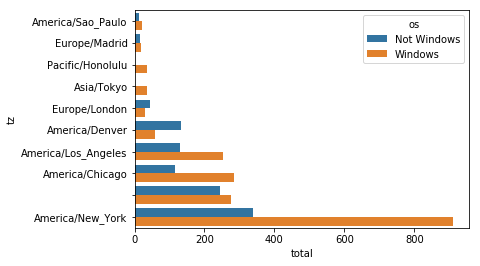

In [186]:
sns.barplot(x='total', y='tz', hue='os', data=count_subset)

In [187]:
def norm_total(group):
    group['normed_total'] = group.total / group.total.sum()
    return group

results = count_subset.groupby('tz').apply(norm_total)

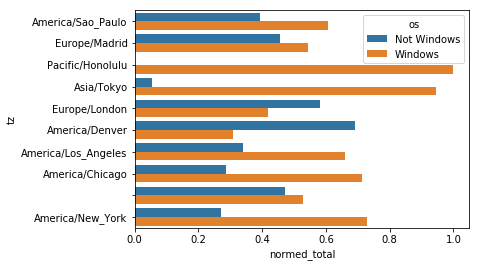

In [188]:
sns.barplot(x='normed_total', y='tz', hue='os', data=results)

In [189]:
g = count_subset.groupby('tz')
results2 = count_subset.total / g.total.transform('sum')

## MovieLens 1M Dataset
#### GroupLens Research provides a number of collections of movie ratings data gathered from users of MovieLens.
#### The data provides movie ratings, movie metadata (genre and year) and demographic data (age, zip code, gender and occupation).
#### Such data is often useful in development of recommendation systems using machine learning algorithms.
#### Although ML is not the focus here, we can use techniques to slice and dice the data to get the exact form we need.
#### The MovieLens 1M dataset has 1 million ratings collected from 6000 users on 4000 movies.
#### It's spread across 3 tables - ratings, user information, and movie information.
#### The first step is to load the tables into a DataFrame using 'pandas.read_table'. You can verify success by checking first few rows of each dataset.

In [190]:
# Smaller display
pd.options.display.max_rows = 10

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('datasets/movielens/users.dat', sep='::',
                      header=None, names=unames, engine='python')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('datasets/movielens/ratings.dat', sep='::',
                       header=None, names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('datasets/movielens/movies.dat', sep='::',
                       header=None, names=mnames, engine='python')

In [191]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [192]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [193]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [194]:
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


#### The ages and occupations in 'users' are encoded as integers which indicate to groups in the README file.
#### Analyzing data across 3 tables is not easy. eg - Compute mean ratings for a movie by sex and age.
#### The task will be easier with all the 3 tables merged into a single one. This can be achieved with pandas's 'merge' function.
#### We first merge ratings with users and then merge that result with movies. pandas infers which columns to use as the merge (join) keys based on overlapping names.

In [195]:
data = pd.merge(pd.merge(ratings, users), movies)
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [196]:
data.iloc[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

#### To get mean movie ratings grouped by gender, we use the 'pivot_table' method. This will return DataFrame with movie titles as row labels (index) and gender as column labels.
#### We can filter the data by accepting movies that received at least 250 ratings (arbitrary). To get this, we group data by title and use 'size()' to get Series of group sizes for each title.The index of titles can be used to select rows from 'mean_ratings'.

In [197]:
mean_ratings = data.pivot_table('rating', index='title',
                               columns = 'gender', aggfunc='mean')
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [198]:
ratings_by_title = data.groupby('title').size()
ratings_by_title[:5]

title
$1,000,000 Duck (1971)            37
'Night Mother (1986)              70
'Til There Was You (1997)         52
'burbs, The (1989)               303
...And Justice for All (1979)    199
dtype: int64

In [199]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [200]:
# Select rows on index
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


### Measuring Rating Disagreement
#### To see top films among female viewers, we can sort the 'F' column in descending order.
#### But to find movies that are most divisive between male and female viewers, you need to add a column containing the difference ('diff') in means and then sort by it.
#### Sorting by 'diff' shows the greatest rating difference so that we can see which ones were preferred by women.

In [201]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


In [202]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

sorted_by_diff = mean_ratings.sort_values(by='diff')
sorted_by_diff[:10]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


#### Reversing the order of rows and slicing top 10 would give us movies preferred by men that women didn't like.
#### To get movies that elicited most disagreement among viewers independent of their gender, can be achieved measuring the variance or standard deviation of the ratings.

In [203]:
sorted_by_diff[::-1][:10]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


In [204]:
# Std Dev of ratings grouped by title
rating_std_by_title = data.groupby('title')['rating'].std()

# Filter down active_titles
rating_std_by_title = rating_std_by_title.loc[active_titles]

# Order in descending
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

## US Baby Names 1880-2010
#### The US Social Security Administration (SSA) has made available the frequency of baby names from 1880 to present.
#### To load and use this dataset, we need to do some data-wrangling. There are many things we may want to do with this dataset:
####     1. Visualize proportions of babies given a certain name over time.
####     2. Determine relative rank of a name.
####     3. Determine most popular names each year and names whose popularity has increased or declined the most.
####     4. Analyzing trends in names - vowels, consonants, length, etc.
####     5. Analyze external sources of trends - biblical names, celebrities, demographic changes.
#### The SSA releases 1 data file per year, containing total number of births for each sex/year combination.
#### After downloading and unzipping the folder, we can see a series of files named in the format 'yob1880.txt'. We can use 'more' command (or 'head' in Unix) to check first few lines in the file.  

In [205]:
!more /e datasets\babynames\yob1880.txt

Mary,F,7065
Anna,F,2604
Emma,F,2003
Elizabeth,F,1939
Minnie,F,1746
Margaret,F,1578
Ida,F,1472
Alice,F,1414
Bertha,F,1320
Sarah,F,1288
Annie,F,1258
Clara,F,1226
Ella,F,1156
Florence,F,1063
Cora,F,1045
Martha,F,1040
Laura,F,1012
Nellie,F,995
Grace,F,982
Carrie,F,949
Maude,F,858
Mabel,F,808
Bessie,F,794
Jennie,F,793
Gertrude,F,787
Julia,F,783
Hattie,F,769
Edith,F,768
Mattie,F,704
Rose,F,700
Catherine,F,688
Lillian,F,672
Ada,F,652
Lillie,F,647
Helen,F,636
Jessie,F,635
Louise,F,635
Ethel,F,633
Lula,F,621
Myrtle,F,615
Eva,F,614
Frances,F,605
Lena,F,603
Lucy,F,591
Edna,F,588
Maggie,F,582
Pearl,F,569
Daisy,F,564
Fannie,F,560
Josephine,F,544
Dora,F,524
Rosa,F,507
Katherine,F,502
Agnes,F,473
Marie,F,471
Nora,F,471
May,F,462
Mamie,F,436
Blanche,F,427
Stella,F,414
Ellen,F,411
Nancy,F,411
Effie,F,406
Sallie,F,404
Nettie,F,403
Della,F,391
Lizzie,F,388
Flora,F,365
Susie,F,361
Maud,F,345
Mae,F,344
Etta,F,323
Harriet,F,319
Sadie,F,317
Caroline,F,306
Katie,F,303
Lydia,F,302
Elsie,F,301
Kate,F,299
Susan,

#### The file is in a comma-seperated form and so can be loaded into a DataFrame with 'pandas.read_csv'.
#### The file only contains names that have at least 5 occurences in each year. So for simplicity, we can use sum of births by sex as total number of births each year.
#### Since data is split into files by year, we need to assemble them all into a single DataFrame using 'pandas.concat' and add a 'year' field.
#### concat glues DataFrame objects row-wise by default. Also, we do not need the original row numbers, so we will pass 'ignore_index=True' when concatenating.

In [206]:
names1880 = pd.read_csv('datasets/babynames/yob1880.txt',
                       names=['name', 'sex', 'births'])
names1880[:5]

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [207]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [208]:
years = range(1880, 2011)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'datasets/babynames/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year
    pieces.append(frame)
    
# Concatenate everything in a single DataFrame
names = pd.concat(pieces, ignore_index=True)
names[:10]

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


#### With a large DataFrame in hand, we can aggregate the data by year and sex level using either 'groupby' or 'pivot_table'.
#### Next, we will insert a column 'prop' which contains fraction of babies havin a name, relative to total number of births. eg - prop of 0.2 means 2 out of every 100 babies were given that name.
#### It is always good to have a sanity check while doing group operations like this. eg - checking the 'prop' column sums to 1 within all groups. 

In [209]:
total_births = names.pivot_table('births', index='year',
                                columns = 'sex', aggfunc=sum)

total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


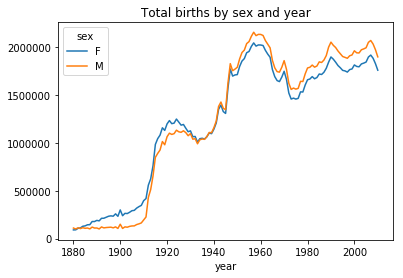

In [210]:
total_births.plot(title='Total births by sex and year')

In [211]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group

names = names.groupby(['year', 'sex']).apply(add_prop)
names[:10]

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [212]:
# Sanity check
names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

#### We will extract a subset of top 1000 names for each sex/year combination for further analysis.
#### This can be done by a group operation or with a more manual approach.
#### The final dataset is a bit smaller and will be used for further investigations.

In [213]:
# Group operation approach
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
# Drop group index as it is not needed
top1000.reset_index(inplace=True, drop=True)

In [214]:
# More manual approach
'''
pieces=[]
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_values(by='births', ascending=False)[:1000])
    
top1000 = pd.concat(pieces, ignore_index=True)
'''

"\npieces=[]\nfor year, group in names.groupby(['year', 'sex']):\n    pieces.append(group.sort_values(by='births', ascending=False)[:1000])\n    \ntop1000 = pd.concat(pieces, ignore_index=True)\n"

In [215]:
top1000[:10]

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


### Analyzing Naming Trends
#### With the dataset of top 1000 names in hand, we can start analyzing various naming trends that we find interesting.
#### Splitting the names into boy and girl portions is easy. But getting a time Series (eg - number of babies with a certain name each year) will require data munging.
#### We will first form a pivot table of total number of births by year and name. We can then plot this data with the 'plot' method. We will only focus on a few names.
#### We can conclude that the names that we plotted have grown out of favor. But there can be other factors as we will see later.

In [216]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [217]:
total_births = top1000.pivot_table('births', index='year',
                                  columns = 'name',
                                  aggfunc=sum)

total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000203B283C4E0>,
      dtype=object)

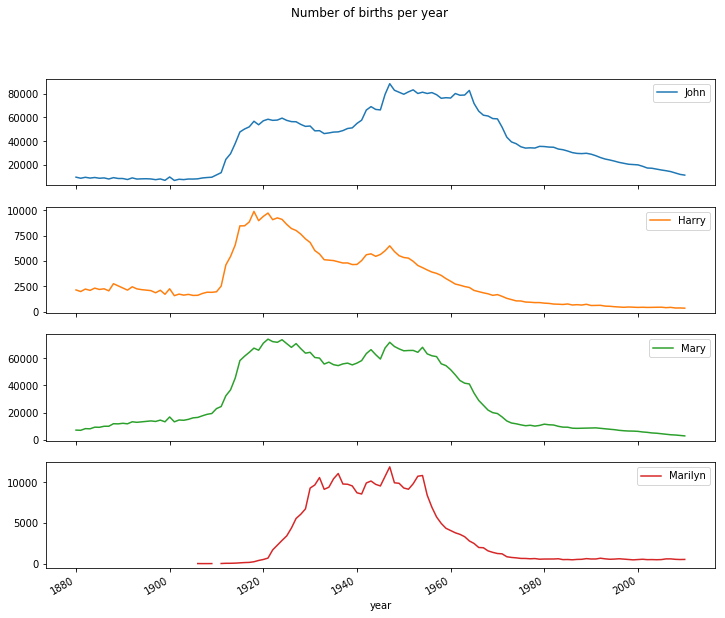

In [218]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots=True, figsize=(12, 10), grid=False,
           title = "Number of births per year")

### Measuring Increase in Naming Diversity
#### From previous analyses, we concluded that fewer parents are choosing common names for their children.
#### We can explore this hypothesis further and confirm it with data. One measure is the proportion of births represented by top 1000 names, which we aggregate and plot by year and sex.
#### We can see the plot that there is a decrease in the total proportion of the top 1000 names along the years. Which means that parents are choosing other names for their babies.

In [219]:
table = top1000.pivot_table('prop', index='year',
                           columns = 'sex', aggfunc=sum)
table[:10]

sex,F,M
year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539
1885,0.992251,0.995501
1886,0.989504,0.995035
1887,0.988279,0.996697
1888,0.984241,0.992429


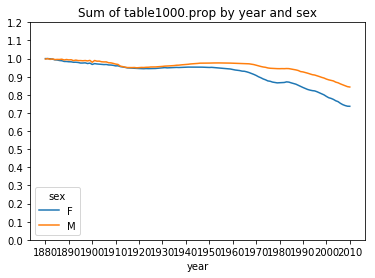

In [220]:
table.plot(title='Sum of table1000.prop by year and sex',
          yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

#### Another interesting measure is the number of distinct names in order of popularity from lowest to highest in the top 50% births.
#### It is a little tricky to compute so we will only focus on boys' names. We will sort 'prop' in descending order. 
#### Then we need to know the most popular names to reach 50%. We can use a for loop but Vectorized NumPy array is more clever.
#### Taking the cumulative sum ('cumsum') of the 'prop' and then calling 'searchsorted' returns position in cumulative sum at which 0.5 would need to be inserted to keep it in sorted order.
#### When comparing the year 2010, where the number of names that added up to 50% of total names is 117, the year 1990 has just 25 names that make up 50%. This shows an increase in naming diversity.

In [221]:
df = boys[boys.year == 2010]
df[:10]

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
260882,Alexander,M,16634,2010,0.008762
260883,Noah,M,16281,2010,0.008576
260884,Daniel,M,15679,2010,0.008259
260885,Aiden,M,15403,2010,0.008114
260886,Anthony,M,15364,2010,0.008093


In [222]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum[:10]

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64

In [223]:
# Arrays are 0-indexed, so total would be 117
prop_cumsum.values.searchsorted(0.5)

116

In [224]:
df = boys[boys.year == 1900]
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()
in1900.values.searchsorted(0.5) + 1

25

#### We can apply this operation to all the years for both sexes, by applying groupby on those fields and apply a function returning count for each group.
#### The result has 2 time series, one for each sex, indexed by year. This can be inspected better as a plot.
#### From the plot we can see that girl names are more diverse than boy names, and continue to be so.

In [225]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


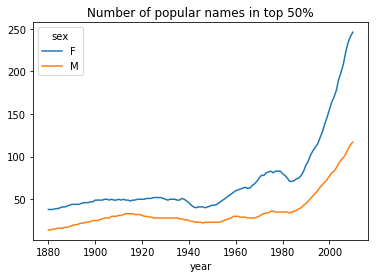

In [226]:
diversity.plot(title="Number of popular names in top 50%")

### The "Last Letter" Revolution
#### Recent research has shown that the distribution of boy names by final letter has changed significantly over last 100 years.
#### To verify this, we will aggregate the full dataset by year, sex and final letter.
#### The we select 3 years (1910, 1960 and 2010) which span the history and check their first few rows.
#### Next, we normailze the table by total births to compute a new table having proportion of total births for each sex ending in each letter.

In [227]:
# Extracting last letter
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

table = names.pivot_table('births', index=last_letters,
                         columns=['sex', 'year'], aggfunc=sum)

In [228]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [229]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [230]:
letter_prop = subtable / subtable.sum()

letter_prop[:10]

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
f                 NaN  0.000010  0.000055  0.000783  0.004325  0.001188
g            0.000144  0.000157  0.000374  0.002250  0.009488  0.001404
h            0.051529  0.036224  0.075852  0.045562  0.037907  0.051670
i            0.001526  0.039965  0.031734  0.000844  0.000603  0.022628
j                 NaN       NaN  0.000090       NaN       NaN  0.000769

#### With the proportions in hand, we can make bar plots for each sex broken down by year.
#### From the plot, we can see that boy names ending in 'n' have increased since 1960s.
#### Now we will focus on just 3 letters (d, n and y) on the entire dataset for boy names. We will normalize by year and sex, select a subset of the letters and transpose each column into time series.
#### With the time series, we can plot trends over time with 'plot' method.

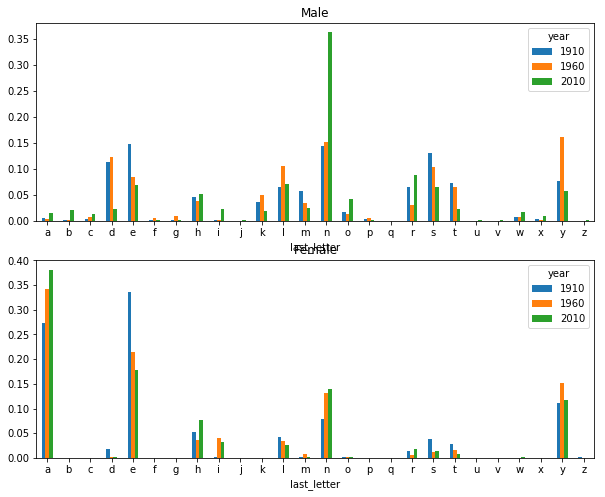

In [231]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,1 , figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female')

In [232]:
# Checking for trends in boy names ending in d, n and y
letter_prop = table / table.sum()

dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


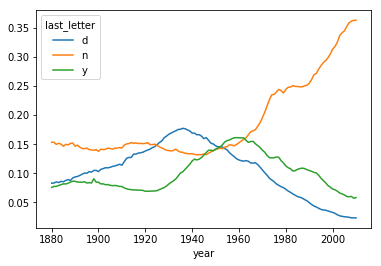

In [233]:
dny_ts.plot()

### Boy Names that became Girl Names
#### A fun trend is looking at names that were more popular with one sex in earlier years but 'changed sexes' in the present. eg - Lesley or Leslie.
#### Going to the top1000 DataFrame, we first compute a list of names in the dataset that start with 'lesl'.
#### Then we can filter down to the names and sum births grouped by name to see relative frequencies.
#### Next, we aggregate by sex and year and normalize within year. This can be plotted as breakdown by sex over time.

In [234]:
all_names = pd.Series(top1000.name.unique())
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

In [235]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [236]:
table = filtered.pivot_table('births', index='year',
                            columns='sex', aggfunc='sum')
table = table.div(table.sum(1), axis=0)

table.tail()

sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


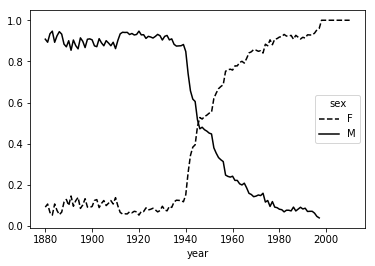

In [237]:
table.plot(style={'M': 'k-', 'F': 'k--'})

## Federal Election Commission Database
#### The US Federal Election Comission publishes data on contribution to political campaigns. This includes contributor names, occupation and employer, address and amount.
#### We will focus on the 2012 US Presidential election. It can be easily downloaded with 'pandas.read_csv'.
#### The objective is to extract informative statistics about donors and patterns in campaign contributions.
#### It would be good to include political affiliations, which are not originally included in the data. We can get unique political candidates using 'unique'.
#### Then we can indicate party affiliation using a dict mapping and the 'map' method to convert political candidates to political parties. This will be added as a new column 'party'.

In [238]:
fec = pd.read_csv('datasets/fec/P00000001-ALL.csv')
fec.info()

C:\Users\adity\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [239]:
fec.iloc[123456]

cmte_id             C00431445
cand_id             P80003338
cand_nm         Obama, Barack
contbr_nm         ELLMAN, IRA
contbr_city             TEMPE
                    ...      
receipt_desc              NaN
memo_cd                   NaN
memo_text                 NaN
form_tp                 SA17A
file_num               772372
Name: 123456, Length: 16, dtype: object

In [240]:
unique_cands = fec.cand_nm.unique()
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [241]:
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

In [242]:
fec['party'] = fec.cand_nm.map(parties)

fec['party'].value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

#### Before doing any analysis, we need to consider a few simplifications.
#### First, there contributions and refunds (negative contributions in dataset). We will consider only positive contributions.
#### Second, we will only consider the two main candidates - Barack Obama and Mitt Romney.

In [243]:
(fec.contb_receipt_amt > 0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

In [244]:
fec = fec[fec.contb_receipt_amt > 0]

In [245]:
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]

### Donation Statistics by Occupation and Employer
#### Donation by occupation is an oft-studied statistic. eg - lawyers tend to donate to Democrats, while business executives to Republicans.
#### We can see this trend in the data. First we will get the total donations by occupations.
#### These occupations refer to some basic job types, or are variants of the same thing. We can use a mapping function to clean up by mapping one occupation to another.
#### The trick is using 'dict.get' to allow occupations with no mapping to 'pass through'.
#### The same technique can be used for employers.

In [246]:
fec.contbr_occupation.value_counts()[:10]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

In [247]:
occ_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
    'INFORMATION REQUESTED' : 'NOT PROVIDED',
    'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
    'C.E.O.': 'CEO'
}

# If no mapping, return x
f = lambda x: occ_mapping.get(x, x)
fec.contbr_occupation = fec.contbr_occupation.map(f)

In [248]:
emp_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
    'INFORMATION REQUESTED' : 'NOT PROVIDED',
    'SELF' : 'SELF-EMPLOYED',
    'SELF EMPLOYED' : 'SELF-EMPLOYED'
}

f = lambda x: emp_mapping.get(x, x)
fec.contbr_employer = fec.contbr_employer.map(f)

#### We can use 'pivot_table' and aggregate by party and occupation, then filter down to subset that donated at least 2 billion overall.
#### This data would be easier to look at as a bar plot.
#### Next topic of interest is the top donor occupations or top companies that donated to either of the candidates.
#### For this we can group by candidate name and use 'nlargest'. Then we aggregate by occupation and employer.

In [249]:
by_occupation = fec.pivot_table('contb_receipt_amt',
                               index='contbr_occupation',
                               columns='party', aggfunc='sum')

over_2mm = by_occupation[by_occupation.sum(1) > 2000000]
over_2mm[:10]

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7477194.43
CEO,2074974.79,4211040.52
CONSULTANT,2459912.71,2544725.45
ENGINEER,951525.55,1818373.70
EXECUTIVE,1355161.05,4138850.09
HOMEMAKER,4248875.80,13634275.78
INVESTOR,884133.00,2431768.92
LAWYER,3160478.87,391224.32
MANAGER,762883.22,1444532.37


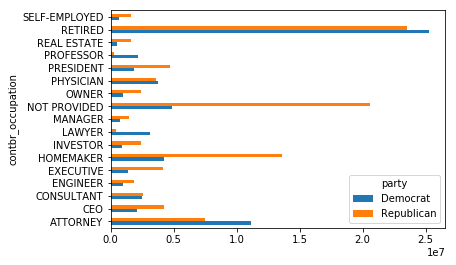

In [250]:
over_2mm.plot(kind='barh')

In [251]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    return totals.nlargest(n)

In [252]:
grouped = fec_mrbo.groupby('cand_nm')

grouped.apply(get_top_amounts, 'contbr_occupation', n=7)

cand_nm        contbr_occupation    
Obama, Barack  RETIRED                  25305116.38
               ATTORNEY                 11141982.97
               INFORMATION REQUESTED     4866973.96
               HOMEMAKER                 4248875.80
               PHYSICIAN                 3735124.94
                                           ...     
Romney, Mitt   HOMEMAKER                 8147446.22
               ATTORNEY                  5364718.82
               PRESIDENT                 2491244.89
               EXECUTIVE                 2300947.03
               C.E.O.                    1968386.11
Name: contb_receipt_amt, Length: 14, dtype: float64

In [253]:
grouped.apply(get_top_amounts, 'contbr_employer', n=10)

cand_nm        contbr_employer      
Obama, Barack  RETIRED                  22694358.85
               SELF-EMPLOYED            17080985.96
               NOT EMPLOYED              8586308.70
               INFORMATION REQUESTED     5053480.37
               HOMEMAKER                 2605408.54
                                           ...     
Romney, Mitt   CREDIT SUISSE              281150.00
               MORGAN STANLEY             267266.00
               GOLDMAN SACH & CO.         238250.00
               BARCLAYS CAPITAL           162750.00
               H.I.G. CAPITAL             139500.00
Name: contb_receipt_amt, Length: 20, dtype: float64

### Bucketing Donation Amounts
#### A useful way to analyze data is to use the 'cut' function to discretize contributor amounts into buckets of contribution size.
#### We can then group the data by the 2 candidates' name and bin label to get histogram by donation size.
#### Through this histogram, we can see that Obama received much larger samll donations than Romney.
#### We can sum the contribution amounts and normalize within buckets to see percentage of total donations by candidate. We will exclude the largest donations from the bar plot as they  are not made by individuals.

In [254]:
bins = np.array([0, 1, 10, 100, 1000, 10000,
                100000, 1000000, 10000000])
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)
labels[:10]

411      (10, 100]
412    (100, 1000]
413    (100, 1000]
414      (10, 100]
415      (10, 100]
416      (10, 100]
417    (100, 1000]
418      (10, 100]
419    (100, 1000]
420      (10, 100]
Name: contb_receipt_amt, dtype: category
Categories (8, interval[int64]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

In [255]:
grouped = fec_mrbo.groupby(['cand_nm', labels])
grouped.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493.0,77.0
"(1, 10]",40070.0,3681.0
"(10, 100]",372280.0,31853.0
"(100, 1000]",153991.0,43357.0
"(1000, 10000]",22284.0,26186.0
"(10000, 100000]",2.0,1.0
"(100000, 1000000]",3.0,NaN
"(1000000, 10000000]",4.0,NaN


In [256]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)

normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)

normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN


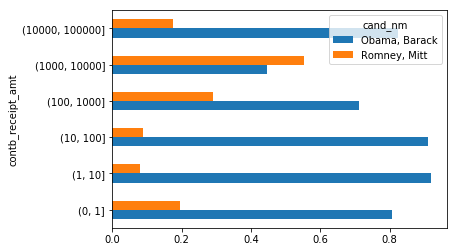

In [257]:
normed_sums[:-2].plot(kind='barh')

### Donation Statistics by State
#### Aggregating by candidate and state is pretty normal. If we divide each row by total contribution amount, we get relative percentage of total donations by state for each candidate.

In [258]:
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals = totals[totals.sum(1) > 100000]

totals[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60
CO,2132429.49,1506714.12
CT,2068291.26,3499475.45
DC,4373538.80,1025137.50
DE,336669.14,82712.00


In [259]:
percent = totals.div(totals.sum(1), axis=0)
percent[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AR,0.772902,0.227098
AZ,0.443745,0.556255
CA,0.679498,0.320502
CO,0.585970,0.414030
CT,0.371476,0.628524
DC,0.810113,0.189887
DE,0.802776,0.197224


## USDA Food Database
#### The US Department of Agriculture makes available a database of food nutrient information. This is available in JSON format.
#### Each food has number of identifying attributes with 2 lists of nutrients and portion sizes. This format is not amenable to analysis, so a little wrangling is needed to get better form.
#### You can load data with any JSON library of your choosing, we will use the built-in 'json' module.
#### each entry is a dict having all the data for a single food. The 'nutrients' field is a list of dicts, one for each nutrient.

In [261]:
import json

db = json.load(open('datasets/usda_food/database.json'))
len(db)

6636

In [262]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [263]:
db[0]['nutrients'][0]

{'value': 25.18,
 'units': 'g',
 'description': 'Protein',
 'group': 'Composition'}

In [264]:
nutrients = pd.DataFrame(db[0]['nutrients'])
nutrients[:7]

,description,group,units,value
0,Protein,Composition,g,25.18
1,Total lipid (fat),Composition,g,29.20
2,"Carbohydrate, by difference",Composition,g,3.06
3,Ash,Other,g,3.28
4,Energy,Energy,kcal,376.00
5,Water,Composition,g,39.28
6,Energy,Energy,kJ,1573.00


#### When converting list of dicts to DataFrame, we can specify list of fields to extract. Here it will be - food names, group, ID, and manufaturer.
#### We can see the distribution of food groups with 'value_counts'.
#### To analyse nutrient data, its easier to assemble nutrients for each food into large table. But this will include several steps.
#### First, convert each list of food nutrient into DataFrame, adding a new column for food 'id'. Then append the DataFrame to a list. These can be concatenated together with 'concat'.
#### We notice duplicates in this DataFrame, so dropping them will make things easier.
#### Since 'group' and 'description' are in both the objects, they need to be renamed for clarity.

In [266]:
info_keys = ['description', 'group', 'id', 'manufacturer']

info = pd.DataFrame(db, columns = info_keys)
info[:5]

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [267]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
description     6636 non-null object
group           6636 non-null object
id              6636 non-null int64
manufacturer    5195 non-null object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [268]:
pd.value_counts(info.group)[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Fast Foods                           365
Legumes and Legume Products          365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Name: group, dtype: int64

In [293]:
# This piece of code is not present in the book. 
# But it is necessary for further steps.
nutrient_list = []

for i in range(len(db)):
    data = pd.DataFrame(db[i]['nutrients'])
    data['id'] = db[i]['id']
    nutrient_list.append(data)
    
nutrients = pd.concat(nutrient_list)
nutrients[:10]

,description,group,units,value,id
0,Protein,Composition,g,25.18,1008
1,Total lipid (fat),Composition,g,29.20,1008
2,"Carbohydrate, by difference",Composition,g,3.06,1008
3,Ash,Other,g,3.28,1008
4,Energy,Energy,kcal,376.00,1008
5,Water,Composition,g,39.28,1008
6,Energy,Energy,kJ,1573.00,1008
7,"Fiber, total dietary",Composition,g,0.00,1008
8,"Calcium, Ca",Elements,mg,673.00,1008
9,"Iron, Fe",Elements,mg,0.64,1008


In [294]:
nutrient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389355 entries, 0 to 49
Data columns (total 5 columns):
description    389355 non-null object
group          389355 non-null object
units          389355 non-null object
value          389355 non-null float64
id             389355 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 17.8+ MB


In [295]:
nutrients.duplicated().sum() #Number of duplicates

14179

In [296]:
nutrients = nutrients.drop_duplicates()

In [297]:
col_mapping = {'description': 'food',
              'group': 'fgroup'}

info = info.rename(columns=col_mapping, copy=False)
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
food            6636 non-null object
fgroup          6636 non-null object
id              6636 non-null int64
manufacturer    5195 non-null object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [298]:
col_mapping = {'description': 'nutrient',
              'group': 'nutgroup'}

nutrients = nutrients.rename(columns=col_mapping, copy=False)
nutrients

,nutrient,nutgroup,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
...,...,...,...,...,...
45,"Vitamin B-12, added",Vitamins,mcg,0.000,43546
46,Cholesterol,Other,mg,0.000,43546
47,"Fatty acids, total saturated",Other,g,0.072,43546
48,"Fatty acids, total monounsaturated",Other,g,0.028,43546


#### With both the DataFrames ready, we can merge 'info' with 'nutrients'.
#### We can make bar plot of median values of food group and nutrient type.
#### With some cleverness, we can also find which food is most dense in each nutrient.
#### We will display just 1 nutrient group - 'Amino Acid'.

In [299]:
ndata = pd.merge(nutrients, info, on='id', how='outer')
ndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 375175
Data columns (total 8 columns):
nutrient        375176 non-null object
nutgroup        375176 non-null object
units           375176 non-null object
value           375176 non-null float64
id              375176 non-null int64
food            375176 non-null object
fgroup          375176 non-null object
manufacturer    293054 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 25.8+ MB


In [300]:
ndata.iloc[3000]

nutrient                 Alcohol, ethyl
nutgroup                          Other
units                                 g
value                                 0
id                                 1159
food            Cheese, goat, soft type
fgroup           Dairy and Egg Products
manufacturer                           
Name: 3000, dtype: object

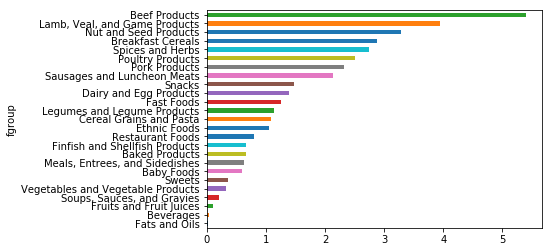

In [301]:
result  = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)
#result
result['Zinc, Zn'].sort_values().plot(kind='barh')

In [303]:
by_nutrient = ndata.groupby(['nutgroup', 'nutrient'])

get_maximum = lambda x: x.loc[x.value.idxmax()]
get_minimum = lambda x: x.loc[x.value.idxmin()]

max_foods = by_nutrient.apply(get_maximum)[['value', 'food']]

# make food a little smaller
max_foods.food = max_foods.food.str[:50]

In [304]:
max_foods.loc['Amino Acids']['food']

nutrient
Alanine                          Gelatins, dry powder, unsweetened
Arginine                              Seeds, sesame flour, low-fat
Aspartic acid                                  Soy protein isolate
Cystine               Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                  Soy protein isolate
                                       ...                        
Serine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Threonine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Tryptophan        Sea lion, Steller, meat with fat (Alaska Native)
Tyrosine         Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Valine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Name: food, Length: 19, dtype: object